In [ ]:
# previous version: Copy of Evaluation_curves_2022_02_09.ipynb

In [1]:
from google.colab import drive
# drive.flush_and_unmount()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/UTRECHT/eval_utils')
sys.path.insert(0,'/content/gdrive/MyDrive/UTRECHT/eval_utils')

In [3]:
import _init_paths
from utils import *
from Evaluator import *
from BoundingBox import BoundingBox
from BoundingBoxes import BoundingBoxes

In [6]:
project_name = '05_Exp3_ContinuousTraining'
trial_list = ['Trial_01', 'Trial_02','Trial_03','Trial_04','Trial_05']
time_step_list =['T0','T1','T2','Full']
trial = trial_list[3]    # set to the trial number
time_step = time_step_list[1] # set to time step number
t_minus_1_time_step = time_step_list[0] # set to previous time step

model = [t_minus_1_time_step + '_model',time_step + '_model']

eval_dir = '/content/gdrive/MyDrive/eval/'  # experiment directory, used for reading the init model
eval_dir = os.path.join(eval_dir, project_name, trial, time_step)

gt_dir = os.path.join(eval_dir, model[0], 'gt')
detections_dir = os.path.join(eval_dir, model[0], 'det')

save_path = os.path.join(eval_dir , model[0],'results2')
if not os.path.exists(save_path): 
    os.makedirs(save_path)

print(gt_dir)
print(detections_dir)
print(save_path)

/content/gdrive/MyDrive/eval/05_Exp3_ContinuousTraining/Trial_04/T1/T0_model/gt
/content/gdrive/MyDrive/eval/05_Exp3_ContinuousTraining/Trial_04/T1/T0_model/det
/content/gdrive/MyDrive/eval/05_Exp3_ContinuousTraining/Trial_04/T1/T0_model/results2




####################################################################################################
#                                                                                                  #
# THE CURRENT VERSION WAS UPDATED WITH A VISUAL INTERFACE, INCLUDING MORE METRICS AND SUPPORTING   #
# OTHER FILE FORMATS.                                                                              #
#                                                                                                  #
# PLEASE ACCESS IT ACCESSED AT:                                                                    #
# https://github.com/rafaelpadilla/review_object_detection_metrics                                 #
#                                                                                                  #
# @Article{electronics10030279,                                                                    #
#     author         = {Padilla, Rafael and Passos, Wesley L. and Dias, Thadeu L. B. and 

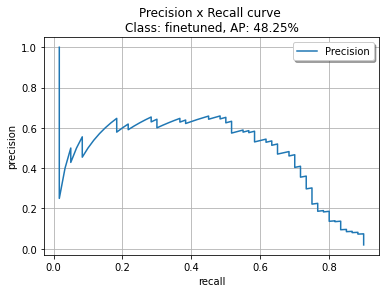

AP: 48.25% (finetuned)
mAP: 48.25%


In [7]:
%run /content/gdrive/MyDrive/UTRECHT/eval_utils/pascalvoc.py -gt /content/gdrive/MyDrive/eval/05_Exp3_ContinuousTraining/Trial_04/T1/T0_model/gt -det /content/gdrive/MyDrive/eval/05_Exp3_ContinuousTraining/Trial_04/T1/T0_model/det -t 0.3 -detformat xyrb -gtformat xyrb -sp /content/gdrive/MyDrive/eval/05_Exp3_ContinuousTraining/Trial_04/T1/T0_model/results2

# find the confidence threshold

In [ ]:
# Read data for comparison of 5 img level split trials
mAP_dict ={}
precision_dict={}
recall_dict = {}
conf_dict = {}

for key in model:
    det_filename = os.path.join(eval_dir, key, 'results','results.txt')
    if os.path.exists(det_filename):
      with open(det_filename) as file:
          lines = file.readlines()
          lines = [line.rstrip() for line in lines]
          mAP = lines[7]
          mAP_dict.update({trial:mAP})
          for i in [8,9,10]:
              tmp_line = lines[i].split(': ')
              if i == 8:
                precision_list = tmp_line[1]
              if i == 9:
                recall_list = tmp_line[1]
              if i==10:
                conf_list = tmp_line[1]
          precision_dict.update({key:precision_list})
          recall_dict.update({key:recall_list})
          conf_dict.update({key:conf_list})

print(mAP)

AP: 37.20%


In [ ]:
for key in precision_dict:
  value = precision_dict[key]
  value = str.split(value, ",")
  tmp_list = []
  for i in value:
      i = str.split(i, "'")
      i = float(i[1])
      tmp_list.append(i)
  value = tmp_list
  precision_dict.update({key:value})
  print(value)

for key in recall_dict:
  value = recall_dict[key]
  value = str.split(value, ",")
  tmp_list = []
  for i in value:
      i = str.split(i, "'")
      i = float(i[1])
      tmp_list.append(i)
  value = tmp_list
  recall_dict.update({key:value})
  print(value)

for key in conf_dict:
  value = conf_dict[key]
  value = str.split(value, ",")
  tmp_list = []
  for i in value:
      i = str.split(i, "'")
      i = float(i[1])
      tmp_list.append(i)
  value = tmp_list
  conf_dict.update({key:value})
  print(value)

[1.0, 0.5, 0.33, 0.5, 0.6, 0.67, 0.57, 0.5, 0.56, 0.5, 0.55, 0.5, 0.46, 0.43, 0.4, 0.38, 0.41, 0.44, 0.47, 0.45, 0.48, 0.5, 0.52, 0.5, 0.48, 0.5, 0.48, 0.5, 0.48, 0.5, 0.52, 0.5, 0.52, 0.5, 0.49, 0.47, 0.49, 0.47, 0.46, 0.45, 0.46, 0.45, 0.44, 0.43, 0.44, 0.46, 0.45, 0.46, 0.45, 0.44, 0.45, 0.46, 0.45, 0.44, 0.44, 0.43, 0.42, 0.41, 0.41, 0.42, 0.41, 0.4, 0.4, 0.39, 0.38, 0.38, 0.37, 0.37, 0.38, 0.37, 0.37, 0.36, 0.37, 0.36, 0.36, 0.36, 0.35, 0.35, 0.34, 0.34, 0.33, 0.34, 0.35, 0.35, 0.34, 0.34, 0.33, 0.33, 0.34, 0.33, 0.33, 0.33, 0.32, 0.32, 0.32, 0.31, 0.31, 0.31, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.29, 0.29, 0.29, 0.28, 0.28, 0.28, 0.28, 0.27, 0.27, 0.28, 0.28, 0.27, 0.27, 0.27, 0.27, 0.26, 0.27, 0.27, 0.27, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.27, 0.27, 0.26, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.25, 0.25, 0.25, 0.26, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.22, 0.22, 0.2

In [ ]:
# get confidence threshold
for i in range(len(recall_dict[key])):
  if recall_dict[key][i] > 0.89:
    print(conf_dict[key][i])
    break

0.03


In [ ]:
# get confidence threshold
for i in range(len(recall_dict[key])):
  if recall_dict[key][i] > 0.89:
    print(precision_dict[key][i])
    break

0.16


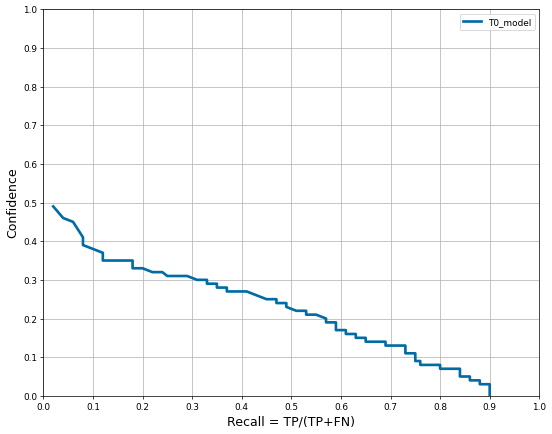

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8), dpi=64, facecolor='w', edgecolor='k')
plt.style.use('tableau-colorblind10')

plt.xlim([0, 1])
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.ylim([0, 1])
plt.yticks(np.arange(0, 1.1, step=0.1))

for key in recall_dict.keys():
    plt.plot(recall_dict[key], conf_dict[key], linewidth=3, label=key)

plt.xlabel("Recall = TP/(TP+FN)", fontsize=14)
plt.ylabel("Confidence", fontsize=14)

plt.grid()
plt.legend(loc="upper right")

# plt.savefig('Precision_recall_matplotlib.png', dpi = 300)